# AW Series 10 analysis: Bland-Alt, MAPE, MAE

## Bland-Altman limits of agreement analysis & plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy import stats

In [2]:
file_path = 's10_vo2_results.xlsx'
df = pd.read_excel(file_path)

In [3]:
df.head()

,Participant ID,Date of test,Time of test,Apple Watch model,VO2max attained?,include_vo2,VO2max 30s lab score (ml/min/kg),AW cardio fit prediction,AW cardio fit prediction date,EEtot kcal Cosmed,total kcal own AW (from VO2 max test),Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,participant01,2024-09-23,15:00:00,S10,Yes,yes,61.23,59.9,2024-09-25 00:00:00,262.0,209.0,NaN,NaN,NaN,NaN,NaN
1,participant02,2024-10-03,12:30:00,S10,Yes,yes,59.60,57.7,2024-10-03 00:00:00,201.0,188.0,NaN,NaN,NaN,NaN,NaN
2,participant03,2024-10-04,12:00:00,S10,Yes,yes,42.88,37.7,2024-10-03 00:00:00,136.0,146.0,NaN,NaN,NaN,NaN,NaN
3,participant04,2024-10-07,12:10:00,S10,Yes,yes,41.67,45.5,2024-10-10 00:00:00,113.0,129.0,NaN,NaN,NaN,NaN,NaN
4,participant05,2024-10-07,13:10:00,S10,Yes,yes,46.33,44.3,2024-10-04 00:00:00,113.0,115.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(40, 16)

In [5]:
df = df[['Participant ID', 'VO2max 30s lab score (ml/min/kg)', 'AW cardio fit prediction', 'include_vo2']]

In [6]:
df.head()

,Participant ID,VO2max 30s lab score (ml/min/kg),AW cardio fit prediction,include_vo2
0,participant01,61.23,59.9,yes
1,participant02,59.60,57.7,yes
2,participant03,42.88,37.7,yes
3,participant04,41.67,45.5,yes
4,participant05,46.33,44.3,yes


In [7]:
df = df.loc[df['include_vo2'].str.strip() != 'no']

In [8]:
df.shape

(35, 4)

In [9]:
df = df.rename(
    columns={'VO2max 30s lab score (ml/min/kg)' : 'cosmed_vo2', 'AW cardio fit prediction' : 'apple_vo2'}
)

In [10]:
df['apple_vo2'] = pd.to_numeric(df['apple_vo2'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 39
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant ID  35 non-null     object 
 1   cosmed_vo2      35 non-null     float64
 2   apple_vo2       35 non-null     float64
 3   include_vo2     35 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


In [12]:
# Calculate Bland-Altman statistics
mean_diff_values = (df['cosmed_vo2'] + df['apple_vo2']) / 2
diff = df['cosmed_vo2'] - df['apple_vo2']
mean_diff = diff.mean()
std_diff = diff.std()

In [13]:
# Calculate standard error
n = len(diff)
se_diff = std_diff / np.sqrt(n)

In [14]:
# Calculate limits of agreement
loa_upper = mean_diff + 1.96 * std_diff
loa_lower = mean_diff - 1.96 * std_diff

In [15]:
# Calculate 95% CI for the mean difference
ci_upper = mean_diff + 1.96 * se_diff
ci_lower = mean_diff - 1.96 * se_diff

In [16]:
# Calculate mean and standard deviation for Cosmed and Apple Watch
mean_cosmed = df['cosmed_vo2'].mean()
cosmed_std = df['cosmed_vo2'].std()
mean_aw = df['apple_vo2'].mean()
aw_std = df['apple_vo2'].std()

In [17]:
# Calculate standard error for Cosmed and Apple Watch
se_cosmed = cosmed_std / np.sqrt(n)
se_aw = aw_std / np.sqrt(n)

In [18]:
# Print results
print(f"The number of participants was: {len(mean_diff_values)}")
print(f"Mean Cosmed: {mean_cosmed:.2f} ml/min/kg.\nMean Apple Watch: {mean_aw:.2f} ml/min/kg.")
print(f"Cosmed standard deviation: {cosmed_std:.2f}.\nAW standard deviation: {aw_std:.2f}")
print(f'Standard deviation of difference: {std_diff:.2f}')
print(f"Cosmed standard error: {se_cosmed}.\nAW standard error: {se_aw:.2f}")
print(f'Standard error of difference: {se_diff:.2f}')
print(f'Mean difference: {mean_diff:.2f}')
print(f'95% CI of mean difference: [{ci_lower:.2f}, {ci_upper:.2f}]')
print(f'Upper limit of agreement: {loa_upper:.2f}')
print(f'Lower limit of agreement: {loa_lower:.2f}')

The number of participants was: 35
Mean Cosmed: 51.51 ml/min/kg.
Mean Apple Watch: 45.26 ml/min/kg.
Cosmed standard deviation: 5.88.
AW standard deviation: 7.64
Standard deviation of difference: 6.11
Cosmed standard error: 0.9941432646919119.
AW standard error: 1.29
Standard error of difference: 1.03
Mean difference: 6.25
95% CI of mean difference: [4.23, 8.28]
Upper limit of agreement: 18.23
Lower limit of agreement: -5.73


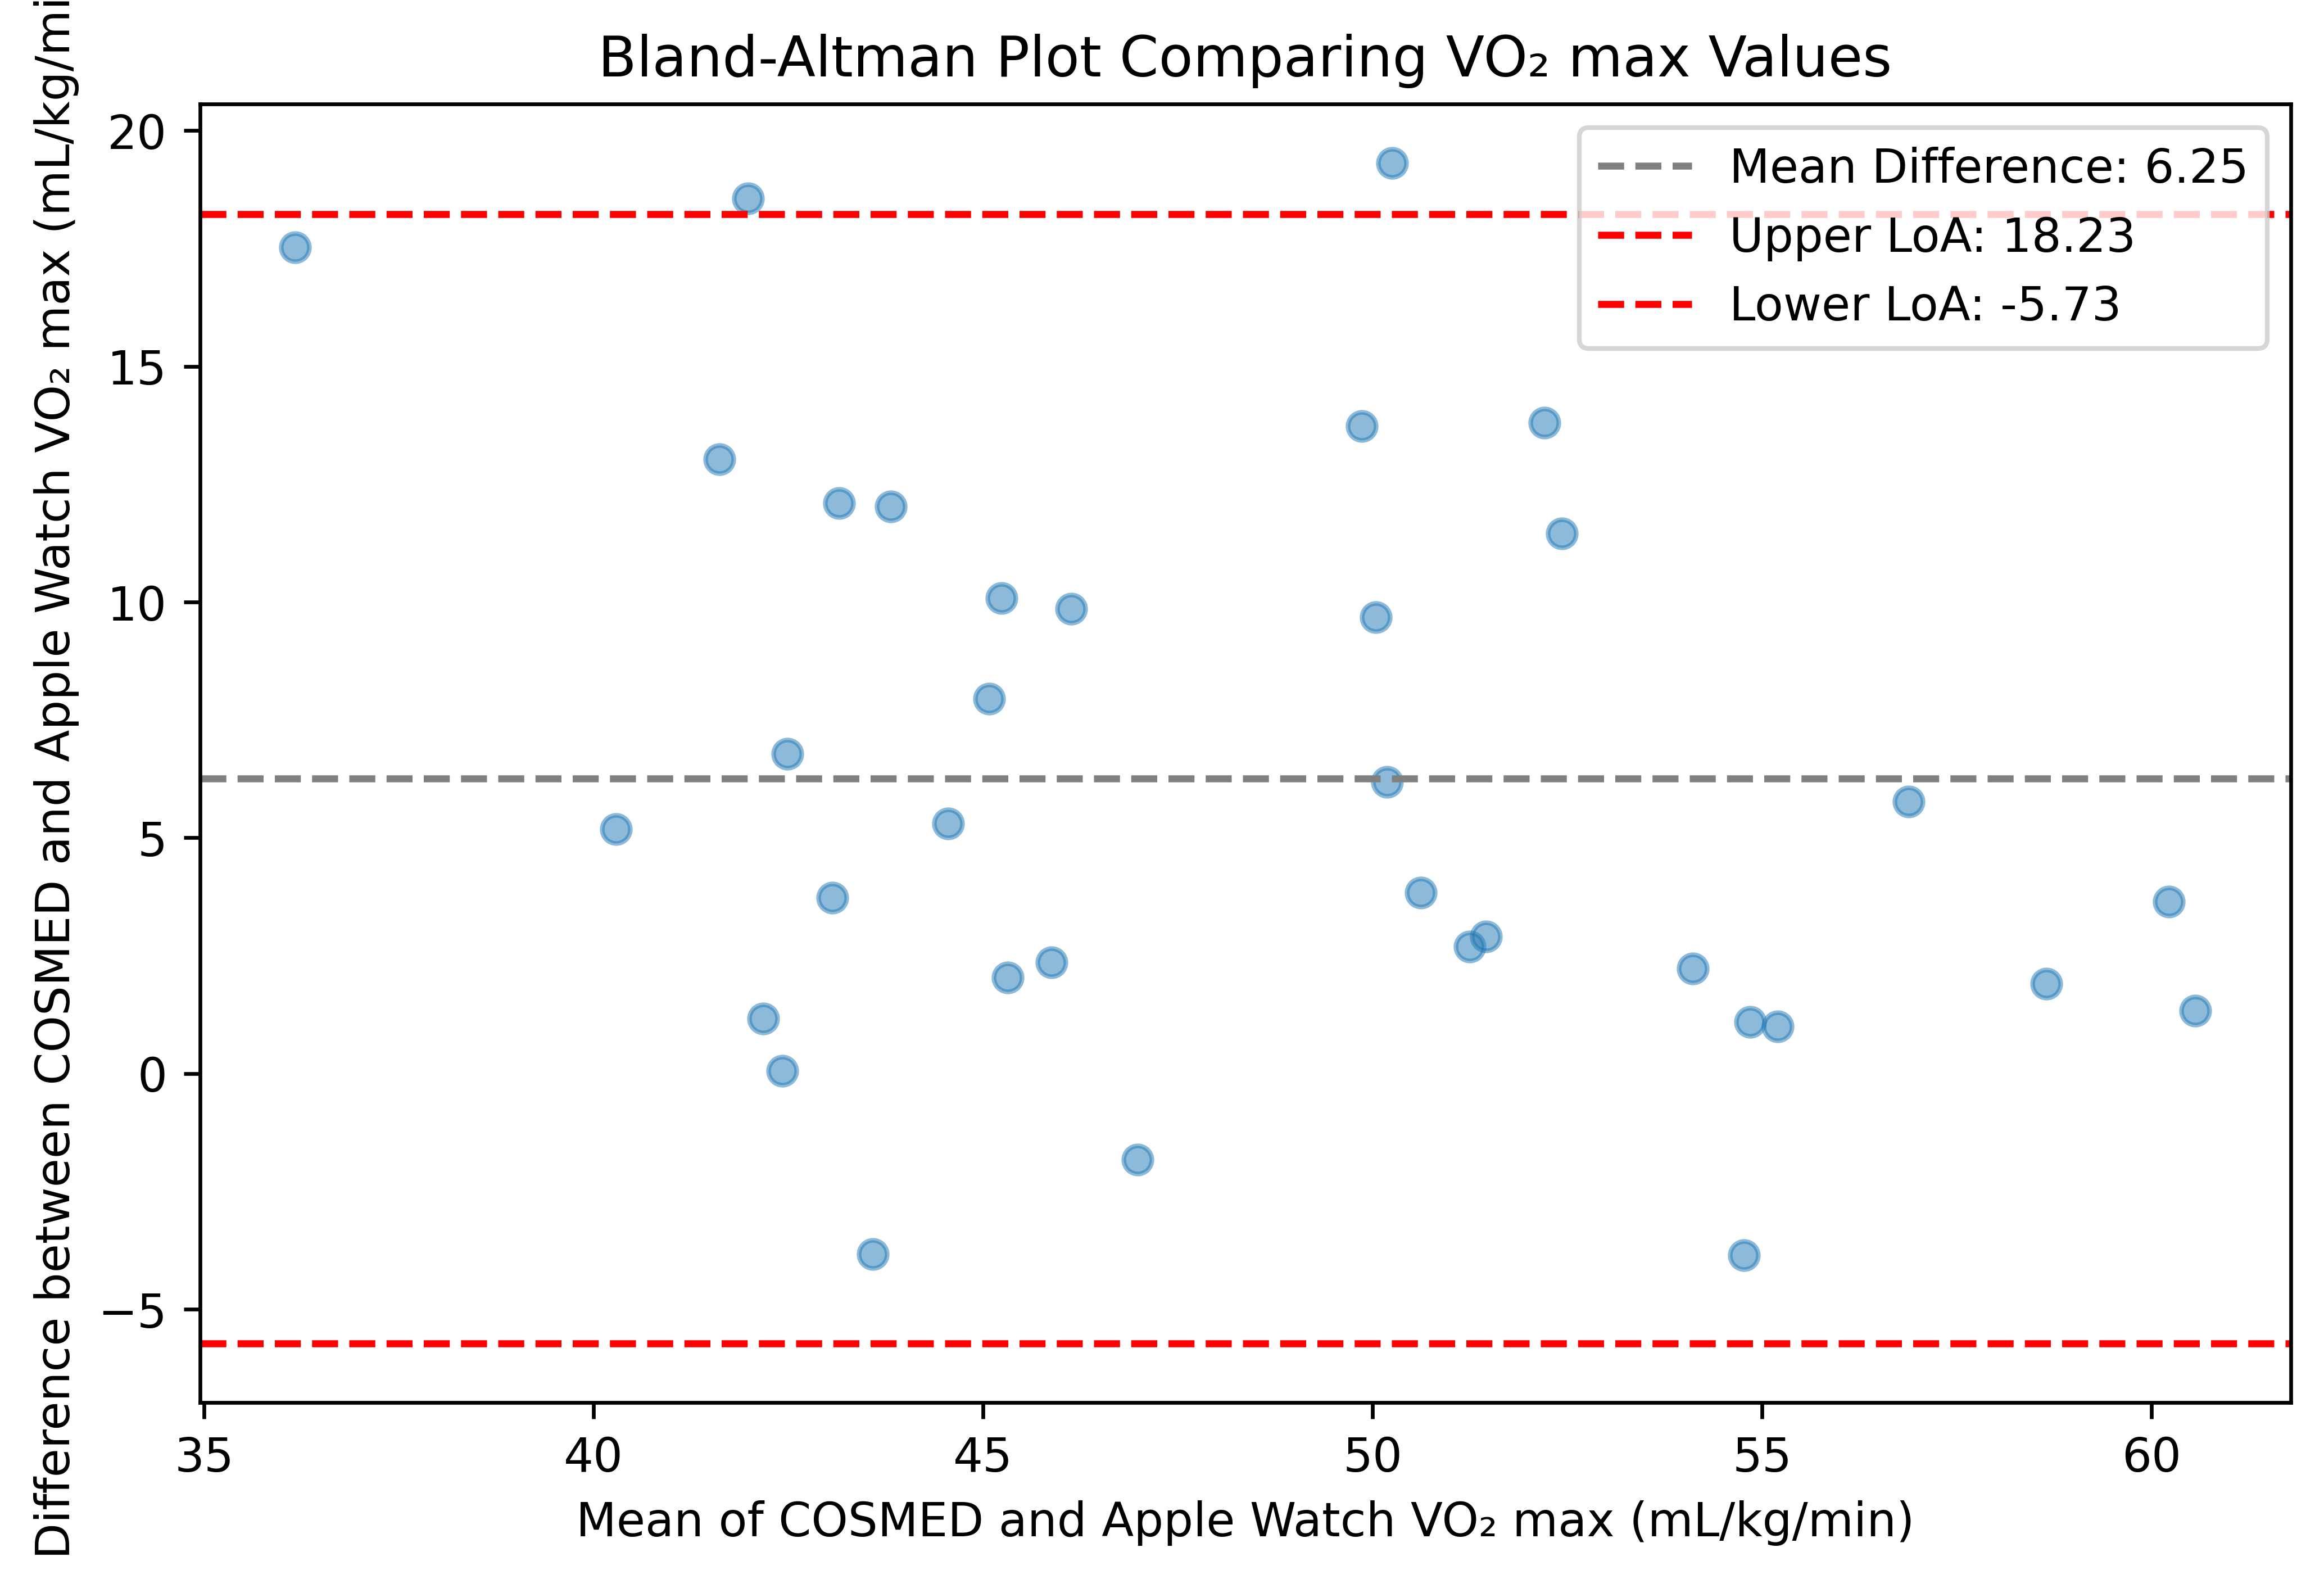

In [19]:
# Create Bland-Altman plot manually
plt.rcParams['font.family'] = 'sans-serif'
plt.figure(figsize=(8, 5), dpi=600)
plt.scatter(mean_diff_values, diff, alpha=0.5)
plt.axhline(mean_diff, color='gray', linestyle='--', label=f'Mean Difference: {mean_diff:.2f}')
plt.axhline(loa_upper, color='red', linestyle='--', label=f'Upper LoA: {loa_upper:.2f}')
plt.axhline(loa_lower, color='red', linestyle='--', label=f'Lower LoA: {loa_lower:.2f}')
plt.title('Bland-Altman Plot Comparing VO\u2082 max Values')
plt.xlabel('Mean of COSMED and Apple Watch VO\u2082 max (mL/kg/min)')
plt.ylabel('Difference between COSMED and Apple Watch VO\u2082 max (mL/kg/min)')
plt.legend()
plt.savefig("series10_blandAlt_plot")
plt.show()

## Mean average percentage error (MAPE)

In [20]:
absolute_errors = df['cosmed_vo2'] - df['apple_vo2']

In [21]:
# Calculate absolute percentage errors
absolute_percentage_errors = (absolute_errors.abs() / df['cosmed_vo2']) * 100

In [22]:
# Sum the absolute percentage errors
sum_absolute_percentage_errors = absolute_percentage_errors.sum()

# Get the total number of data points
total_data_points = len(absolute_percentage_errors)

In [23]:
# Calculate MAPE
mape = sum_absolute_percentage_errors / total_data_points

In [24]:
# Calculate standard error
mean_diff = absolute_errors.mean()
std_diff = absolute_errors.std()
n = len(absolute_errors)
se_diff = std_diff / np.sqrt(n)

In [25]:
# Calculate standard deviation and standard error for MAPE
std_percentage_error = absolute_percentage_errors.std()
n = len(absolute_percentage_errors)
se_percentage_error = std_percentage_error / np.sqrt(n)

In [26]:
# Calculate the t critical value for a 95% confidence level
t_critical = t.ppf(0.975, df=n-1)  # 0.975 corresponds to 95% two-tailed

# Calculate 95% CI for the mean difference
# ci_upper = mean_diff + 1.96 * se_diff
# ci_lower = mean_diff - 1.96 * se_diff

ci_upper = mape + (t_critical * se_percentage_error)
ci_lower = mape - (t_critical * se_percentage_error)

In [27]:
print(f"MAPE for VO2 max is: {mape:.4f} %")
print(f"95% confidence intervals for the absolute error: {ci_lower:.2f}, {ci_upper:.2f}")
print(f"The standard error of the differences is {se_diff:.2f}")

MAPE for VO2 max is: 13.1717 %
95% confidence intervals for the absolute error: 9.56, 16.79
The standard error of the differences is 1.03


## Mean absolute error (MAE)

In [28]:
# Sum the absolute errors
sum_absolute_errors = absolute_errors.sum()

In [29]:
# Divide the sum by the total number of data points
mae = sum_absolute_errors / total_data_points

In [30]:
# ** CALCULATE 95% CONFIDENCE INTERVAL **
# Calculate the standard deviation of the absolute errors
std_dev = absolute_errors.std(ddof=1)

# Calculate the standard error of the mean (SEM)
n = len(absolute_errors)
sem = std_dev / np.sqrt(n)

# 8. Determine the t-critical value for a 95% confidence interval
confidence = 0.95
degrees_freedom = n - 1
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, degrees_freedom)

# Calculate the margin of error
# Usually, margin of error = 1.96 * sem, but for smaller populations, t_crit is more appropriate
margin_of_error = t_crit * sem

# Compute the 95% confidence interval
lower_bound = mae - margin_of_error
upper_bound = mae + margin_of_error

In [31]:
print(f"The Mean Absolute Error for VO2max is {mae:.4f} ml/kg/min.")
print(f"The 95% confidence interval is ({lower_bound:.4f}, {upper_bound:.4f}) ml/kg/min.")
print(f"t-critical value: {t_crit:.4f}")

The Mean Absolute Error for VO2max is 6.2506 ml/kg/min.
The 95% confidence interval is (4.1504, 8.3507) ml/kg/min.
t-critical value: 2.0322
